# Database of MASC images
Some preliminary examples on the manipulation of MASCdb: a database of MASC data

In [1]:
from scipy import stats
from database_reader import wet_bulb_t, masc_database 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({'font.size': 24,
    "legend.frameon": False,
    "font.family": "sans-serif",
    "font.weight": "normal",
    "mathtext.default": "regular"})


In [15]:
# Read MASC database
out = masc_database('/data/MASC_DB/',parquet_id = 'MASCdb')    

## Temperature and size (precip only)
Let's now:
- Filter the database (precip only)
- Plot Dmax as function of temperature and overlay some bars indicating the Q99 of Dmax over wach bin

We expect to see at least some increase of size at temperatures near 0°C

141640


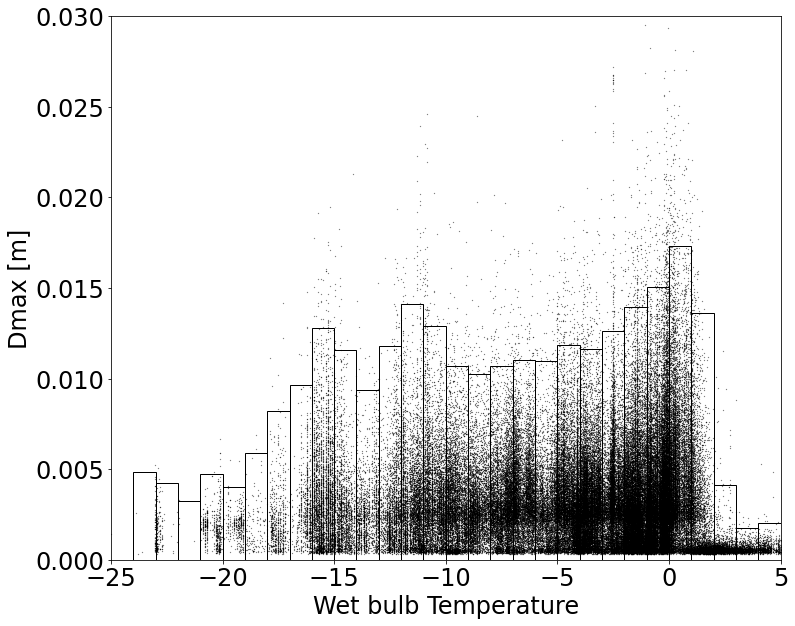

In [17]:
precip = out.keep_precip_type(type="precip")

x=wet_bulb_t(precip.triplet.env_T,precip.triplet.env_RH)
data=precip.triplet.Dmax

condi = ~np.isnan(x*data)

s, edges, _ = stats.binned_statistic(x[condi], data[condi], bins=30,range=(-25,5),statistic = lambda y: np.percentile(y, 99))

fig, ax = plt.subplots(figsize=(12,10))

plt.plot(x[condi],data[condi],'ko',markersize=0.2)
plt.bar(edges[:-1], s, width=np.diff(edges), align="edge", ec="k",fill=False)

ax.set_xlabel('Wet bulb Temperature')
ax.set_ylabel('Dmax [m]')

ax.set_xlim([-25,5])
ax.set_ylim([0,0.03])

plt.show()

And a fast check to see if the estimation of melting from Praz et al 2017 makes sense.
We sahll see that it overall does.

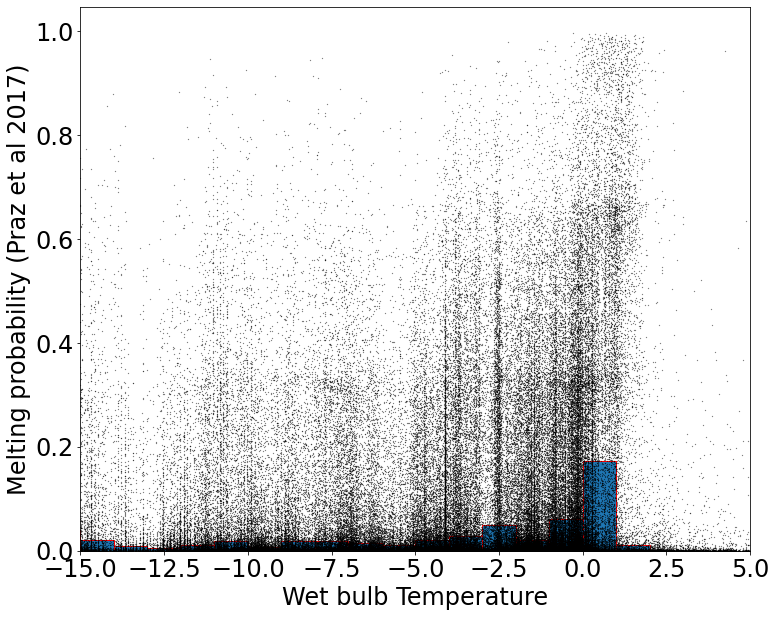

In [5]:
precip = out.keep_precip_type(type="precip")

x=wet_bulb_t(precip.triplet.env_T,precip.triplet.env_RH)
data=precip.triplet.melting_prob

condi = ~np.isnan(x*data)

s, edges, _ = stats.binned_statistic(x[condi], data[condi], bins=30,range=(-25,5),statistic = "median")

fig, ax = plt.subplots(figsize=(12,10))

plt.plot(x[condi],data[condi],'ko',markersize=0.2)
plt.bar(edges[:-1], s, width=np.diff(edges), align="edge", ec="red",fill=True)

ax.set_xlabel('Wet bulb Temperature')
ax.set_ylabel('Melting probability (Praz et al 2017)')

ax.set_xlim([-15,5])

plt.show()

## Wind and size (precip data)
In a similar way, let's check on all the data the maxium size as a function of wind.
We expect, according to previous study, that large snowflakes cannot be observe in high wind condition

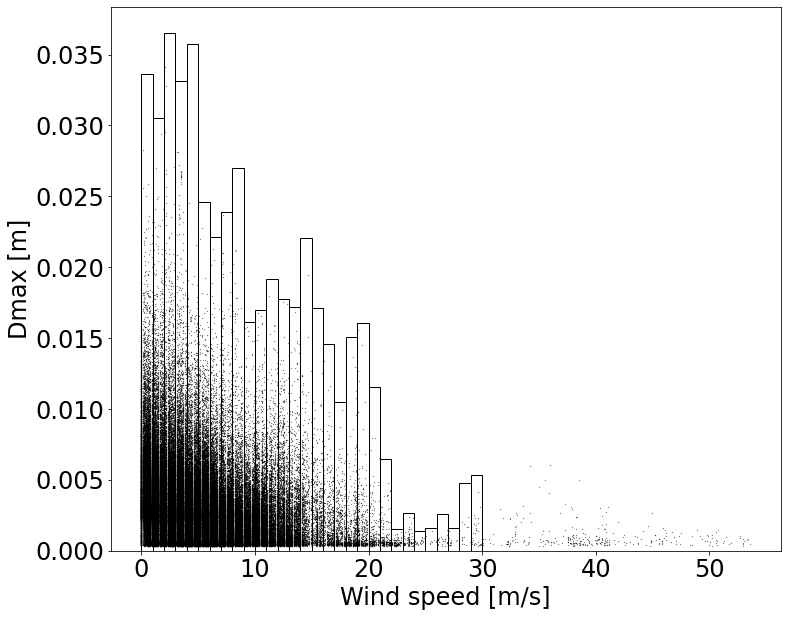

array(['2015-10-18T23:08:38.263939000', '2015-11-20T10:56:24.074812000',
       '2015-11-20T10:57:25.070920000', '2015-11-20T11:46:44.567722000',
       '2015-11-20T11:58:51.326192000', '2015-11-20T12:03:18.695060000',
       '2015-11-20T13:09:09.308403000', '2016-01-04T14:19:30.231858000',
       '2016-03-08T07:43:10.700288000', '2016-04-27T02:13:54.948110000',
       '2016-04-28T09:28:25.888856000', '2016-05-30T16:09:59.165526000',
       '2016-05-30T17:02:26.845455000', '2016-05-30T17:04:54.733709000',
       '2016-05-30T17:28:39.281414000', '2016-05-30T17:54:25.868127000',
       '2016-05-30T17:56:55.441194000', '2016-05-30T18:00:56.524014000',
       '2016-05-31T19:06:13.594520000', '2016-06-04T23:08:41.193485000',
       '2016-06-14T19:38:19.045201000', '2016-06-18T02:36:53.000211000',
       '2016-06-18T17:52:54.174337000', '2016-06-18T19:36:26.058457000',
       '2015-12-22T02:32:50.145091000', '2017-01-27T15:00:51.117808000',
       '2017-02-13T17:44:01.448571000', '2017-02-13

In [18]:
x=precip.triplet.env_FF
data=precip.triplet.Dmax

condi = ~np.isnan(x*data)

s, edges, _ = stats.binned_statistic(x[condi], data[condi], bins=30,range=(0,30),statistic = "max")

fig, ax = plt.subplots(figsize=(12,10))

plt.plot(x[condi],data[condi],'ko',markersize=0.2)
plt.bar(edges[:-1], s, width=np.diff(edges), align="edge", ec="k",fill=False)

ax.set_xlabel('Wind speed [m/s]')
ax.set_ylabel('Dmax [m]')

#ax.set_xlim([-25,5])
#ax.set_ylim([0,0.035])

plt.show()


## Temperature range of large snowflakes
Let's now check the temperature range of occurrence of larger snowflakes (> 1 mm, > 1cm, > 2 cm).
As expected, the largest snowflakes occur around 0°C

Text(0.5, 0, 'T [°C]')

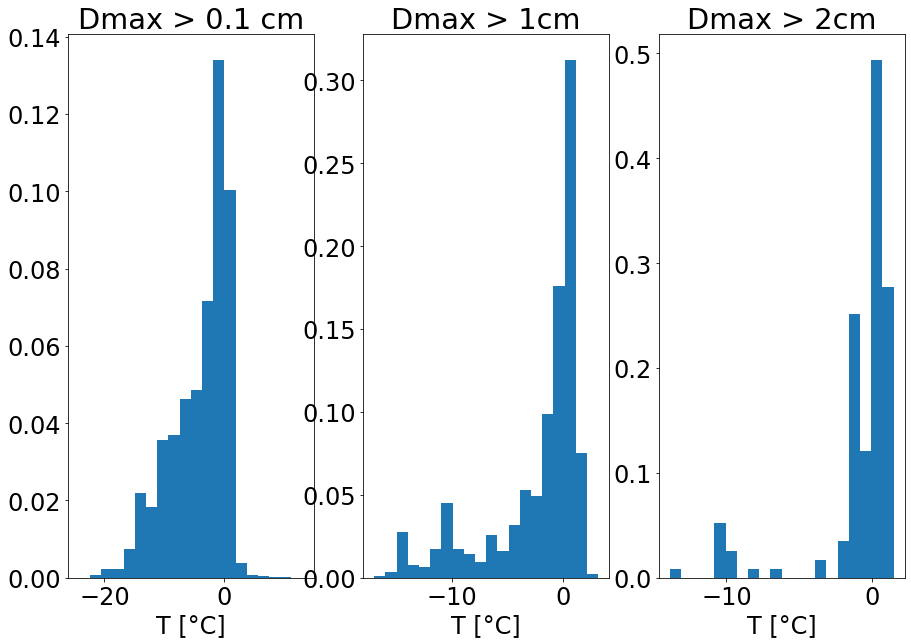

In [22]:
precip = out.keep_precip_type(type="precip")
precip.triplet  = precip.triplet[precip.triplet["Dmax"] > 0.001  ]

fig=plt.subplots(1,3,figsize=(15,10))
plt.subplot(1,3,1)
_ = plt.hist(precip.triplet.env_T,density=True,bins=20)
plt.title('Dmax > 0.1 cm')
plt.xlabel('T [°C]')

plt.subplot(1,3,2)
precip.triplet  = precip.triplet[precip.triplet["Dmax"] > 1e-2  ]
_ = plt.hist(precip.triplet.env_T,density=True,bins=20)
plt.title('Dmax > 1cm')
plt.xlabel('T [°C]')


plt.subplot(1,3,3)
precip.triplet  = precip.triplet[precip.triplet["Dmax"] > 2e-2  ]
_ = plt.hist(precip.triplet.env_T,density=True,bins=20)
plt.title('Dmax > 2cm')
plt.xlabel('T [°C]')

## Snowflakes and orientation
Let's now check some statistics about the orientation of snowflakes:
- Larger than 1 mm
- Larger than 1 cm 
- Larger than 2 cm

Text(0.5, 0, 'Orientation [°]')

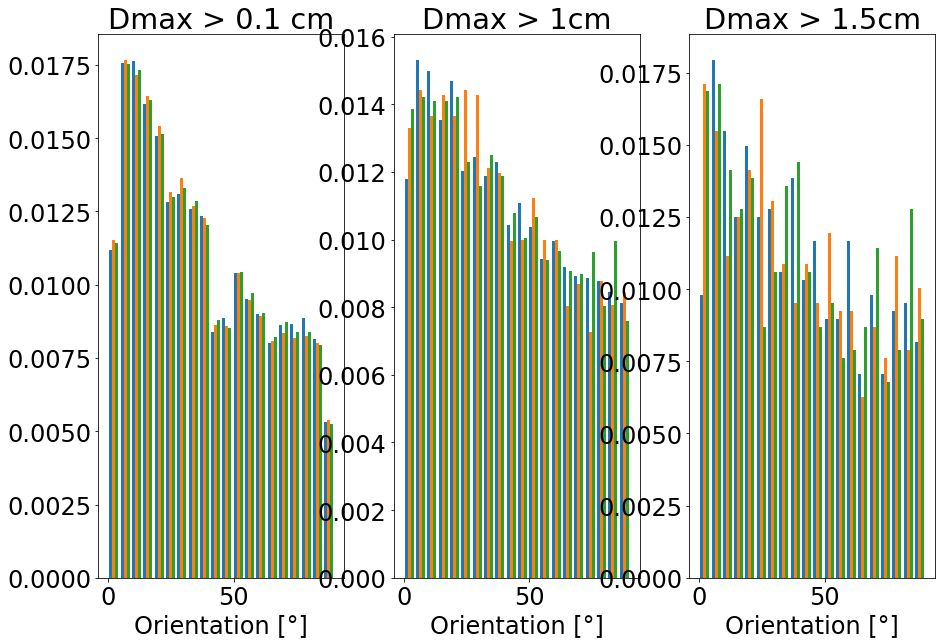

In [20]:
precip = out.keep_precip_type(type="precip")
ori  = [np.abs(precip.cam0[precip.triplet["Dmax"] > 0.001].Dmax_ori),
        np.abs(precip.cam1[precip.triplet["Dmax"] > 0.001].Dmax_ori),
        np.abs(precip.cam2[precip.triplet["Dmax"] > 0.001].Dmax_ori)]

ori2  = [np.abs(precip.cam0[precip.triplet["Dmax"] > 0.01].Dmax_ori),
        np.abs(precip.cam1[precip.triplet["Dmax"] > 0.01].Dmax_ori),
        np.abs(precip.cam2[precip.triplet["Dmax"] > 0.01].Dmax_ori)]

ori3  = [np.abs(precip.cam0[precip.triplet["Dmax"] > 0.015].Dmax_ori),
        np.abs(precip.cam1[precip.triplet["Dmax"] > 0.015].Dmax_ori),
        np.abs(precip.cam2[precip.triplet["Dmax"] > 0.015].Dmax_ori)]


fig=plt.subplots(1,3,figsize=(15,10))
plt.subplot(1,3,1)
_ = plt.hist(ori,density=True,bins=20)
plt.title('Dmax > 0.1 cm')
plt.xlabel('Orientation [°]')

plt.subplot(1,3,2)
_ = plt.hist(ori2,density=True,bins=20)
plt.title('Dmax > 1cm')
plt.xlabel('Orientation [°]')


plt.subplot(1,3,3)
_ = plt.hist(ori3,density=True,bins=20)
plt.title('Dmax > 1.5cm')
plt.xlabel('Orientation [°]')

## Snowflake visualization

### Example 1
Test the associated archive of snowflakes images. Let's display a random snowflake given the following conditions:
- Filter on precipitation only
- Find only large snowflakes (> 1.5 cm)
- Good image quality (Xhi > 12)

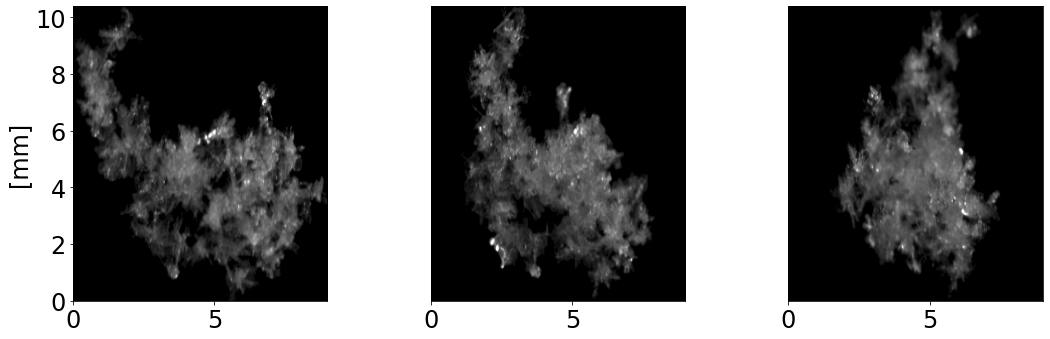

In [67]:
precip = out.keep_precip_type(type="precip")

precip.triplet  = precip.triplet[precip.triplet["Dmax"] > 1e-2  ]
precip.triplet  = precip.triplet[precip.triplet["Xhi"] > 10  ]


fig=precip.plot_flake(random=True,zoom=True)
fig.set_tight_layout(False)
fig.set_size_inches(18.5, 10.5)

### Example 2
- Find a random snowflake classified as planar crystals 
- With good quality (Xhi > 11)

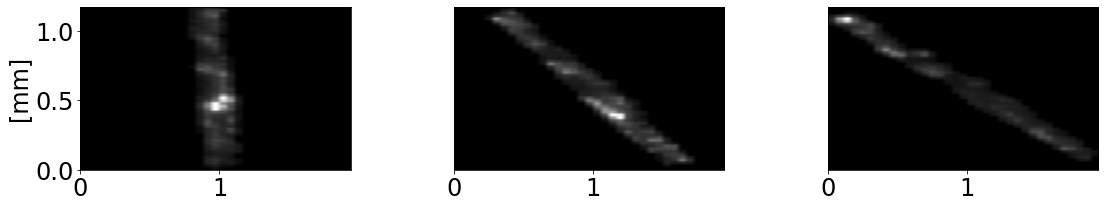

In [87]:
precip = out.keep_precip_type(type="precip")

precip.triplet = precip.triplet[precip.triplet["label_name"] == "columnar_crystal"]
precip.triplet  = precip.triplet[precip.triplet["Xhi"] > 10  ]

fig=precip.plot_flake(random=True,zoom=True)
fig.set_tight_layout(False)
fig.set_size_inches(18.5, 10.5)



### Example 3
- Find a random snowflake classified as aggregate 
- With good quality (Xhi > 11)
- With large size (more than 2 cm)
- Rimed (riming_deg_level above a certain threshold )

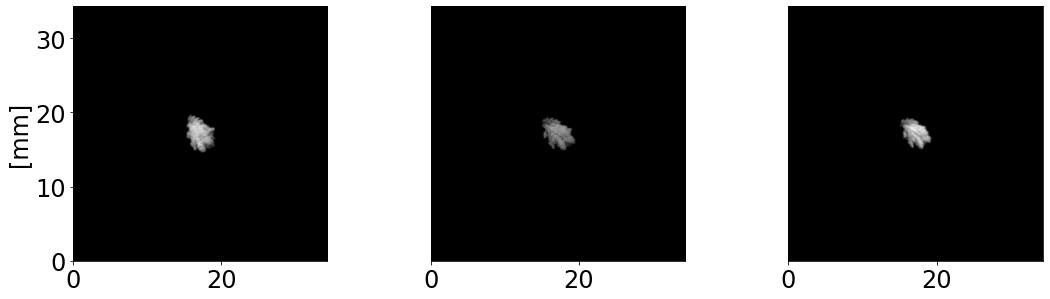

In [64]:
precip = out.keep_precip_type(type="precip")

precip.triplet = precip.triplet[precip.triplet["label_name"] == "aggregate"]
precip.triplet  = precip.triplet[precip.triplet["Dmax"] > 0.5e-2  ]
precip.triplet  = precip.triplet[precip.triplet["Xhi"] > 9  ]
precip.triplet  = precip.triplet[precip.triplet["riming_deg_level"] > 0.95  ]

fig=precip.plot_flake(random=True,zoom=False)
fig.set_tight_layout(False)
fig.set_size_inches(18.5, 10.5)